In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join

In [57]:
flights = sns.load_dataset("flights")
flights.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172


<AxesSubplot: xlabel='year', ylabel='passengers'>

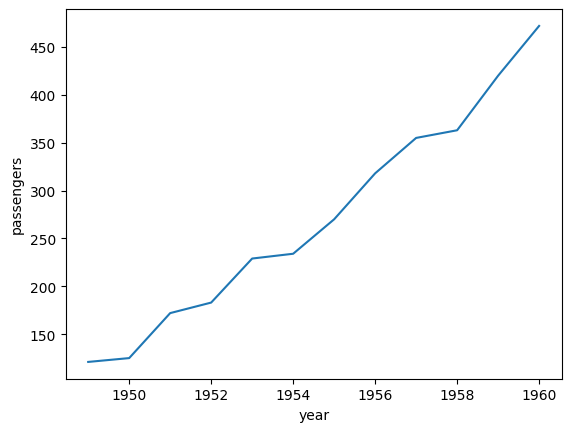

In [60]:
# Axis-level
may_flights = flights.query("month == 'May'")
display(may_flights.head(3))
sns.lineplot(data=may_flights, x="year", y="passengers")

/tmp/ipykernel_19205/586959253.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_wide = flights.pivot("year", "month", "passengers")


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166


<AxesSubplot: xlabel='year'>

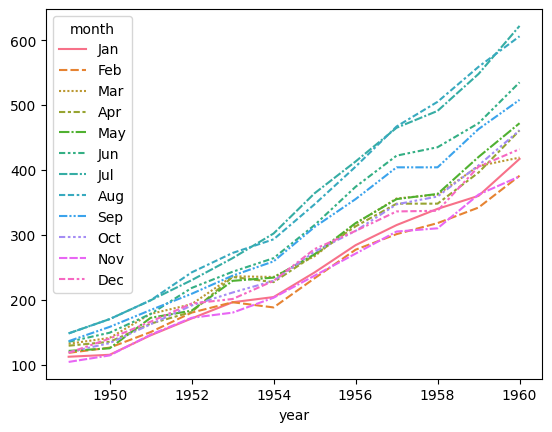

In [62]:
# Axis-level
flights_wide = flights.pivot("year", "month", "passengers")
display(flights_wide.head(3))
sns.lineplot(data=flights_wide)

## Boxplot 

<AxesSubplot: xlabel='total_bill'>

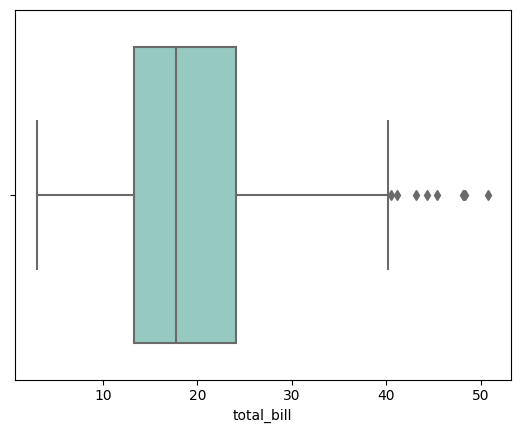

In [71]:
# Boxplot
tips = sns.load_dataset("tips")
# Axis-level
sns.boxplot(data=tips, x="total_bill", palette="Set3")

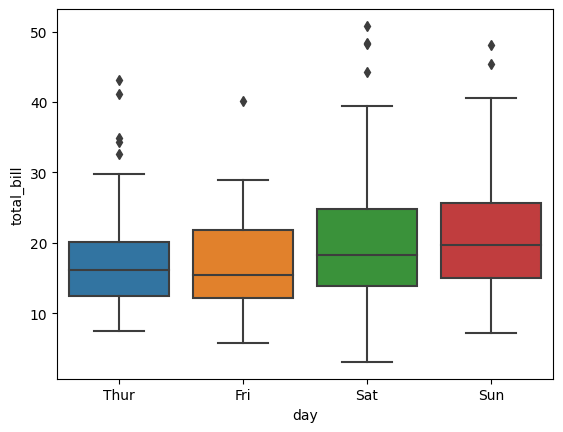

In [68]:
# Axis-level
ax = sns.boxplot(x="day", y="total_bill", data=tips)

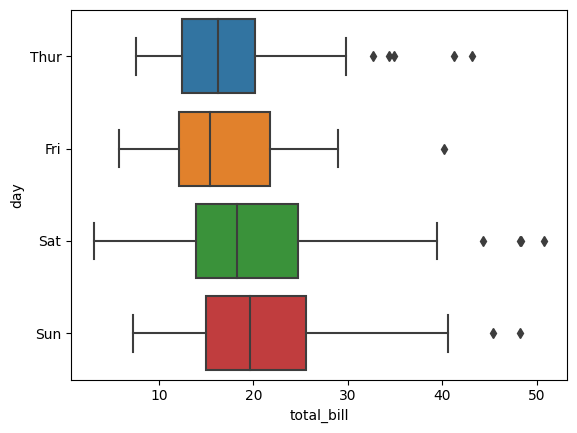

In [80]:
# Axis-level
ax = sns.boxplot(x="total_bill", y="day", data=tips)




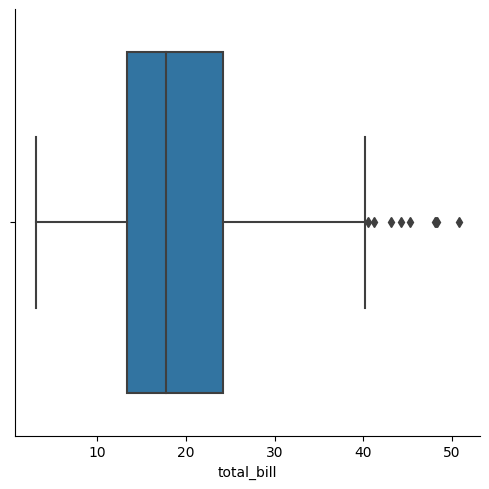

In [86]:
sns.catplot(x="total_bill", data=tips ,kind='box' ) 

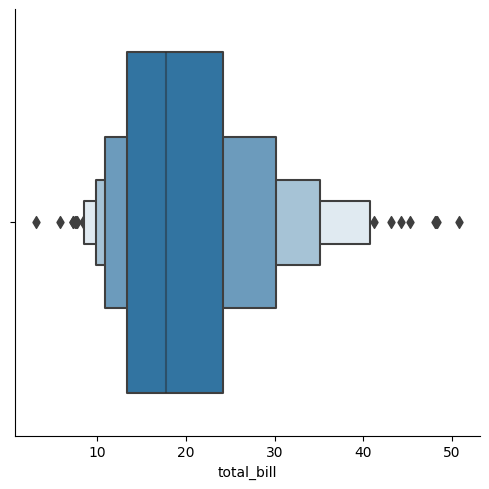

In [87]:
sns.catplot(x="total_bill", data=tips ,kind='boxen' ) 

In [88]:
data_path = '../data/raw/'

# list the files in the data directory 
onlyfiles = [join(data_path,f)  for f in listdir(data_path) if isfile(join(data_path, f))]
print(onlyfiles)

['../data/raw/BTCUSD_1hr.csv', '../data/raw/data_kaggle.csv', '../data/raw/pune_1965_to_2002.csv', '../data/raw/us_presidents 2.csv']


In [91]:
df_lluvias = pd.read_csv(onlyfiles[2])

df_lluvias.head(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.0,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.0,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132


In [92]:
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias.head(3)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.00,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.00,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.32,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685


In [45]:
# matplotlib

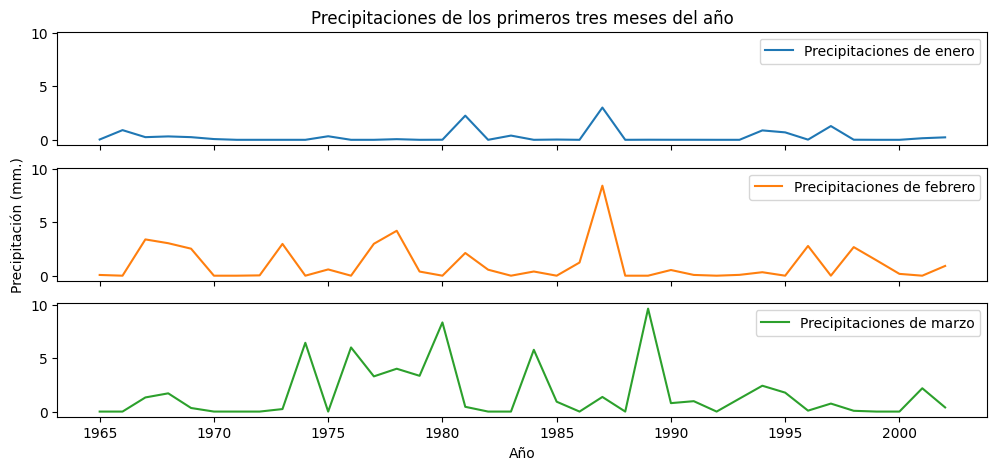

In [100]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')
ax[0].set_title('Precipitaciones de los primeros tres meses del año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Precipitación (mm.)')
ax[0].legend()  
ax[1].legend()
ax[2].legend()  

In [48]:
# Seaborn FacetGrid

In [94]:
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [25]:
df_lluvias_long = df_lluvias.reset_index().melt(id_vars=['Year'], value_vars=['Jan', 'Feb', 'Mar'], var_name='Mes', value_name='Precipitación')

In [96]:
df_lluvias_long.head()

,Year,Mes,Precipitación
0,1965,Jan,0.029
1,1966,Jan,0.905
2,1967,Jan,0.248
3,1968,Jan,0.318
4,1969,Jan,0.248


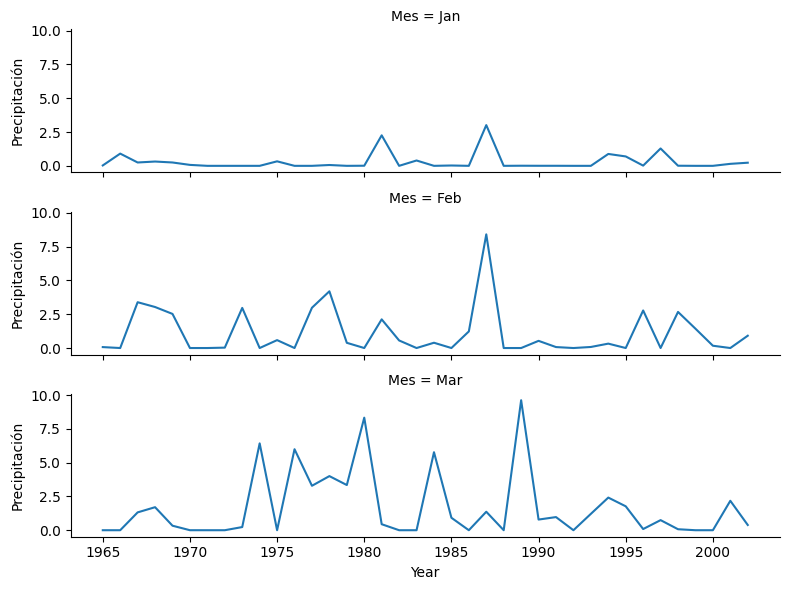

In [101]:
g = sns.FacetGrid(df_lluvias_long, row="Mes", height=2, aspect=4)
g.map(sns.lineplot, "Year", "Precipitación")
plt.show()

In [49]:
# tips
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


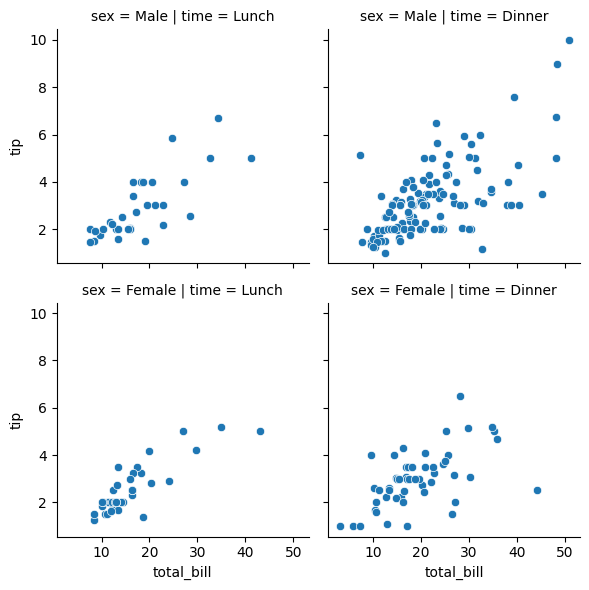

In [39]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

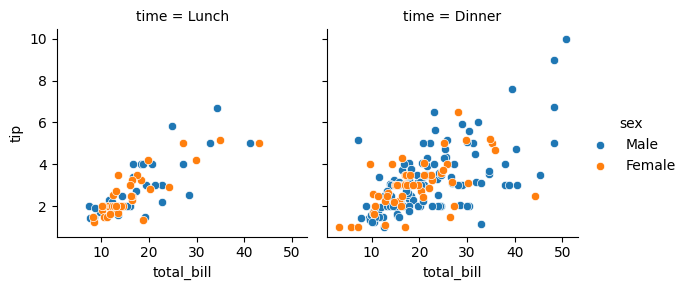

In [36]:
g = sns.FacetGrid(tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()

In [40]:
# ejemplo 

In [103]:
# Ejemplo aplicado
df_ejercicio = sns.load_dataset('exercise')
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns')


In [105]:
df_ejercicio.sample(10)

,id,diet,pulse,time,kind
21,8,no fat,92,1 min,rest
55,19,no fat,98,15 min,walking
18,7,no fat,87,1 min,rest
76,26,no fat,126,15 min,running
44,15,low fat,95,30 min,walking
58,20,no fat,104,15 min,walking
68,23,low fat,99,30 min,running
42,15,low fat,89,1 min,walking
29,10,no fat,100,30 min,rest
43,15,low fat,96,15 min,walking


In [106]:
df_ejercicio.describe()

,id,pulse
count,90.000000,90.000000
mean,15.500000,99.700000
std,8.703932,14.858471
min,1.000000,80.000000
25%,8.000000,90.250000
50%,15.500000,96.000000
75%,23.000000,103.000000
max,30.000000,150.000000


In [108]:
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']
df_30_min.sample(10)

,id,diet,pulse,time,kind
44,15,low fat,95,30 min,walking
47,16,no fat,89,30 min,walking
56,19,no fat,100,30 min,walking
26,9,no fat,96,30 min,rest
5,2,low fat,93,30 min,rest
53,18,no fat,101,30 min,walking
62,21,low fat,110,30 min,running
77,26,no fat,143,30 min,running
71,24,low fat,120,30 min,running
65,22,low fat,112,30 min,running


<Figure size 640x480 with 0 Axes>

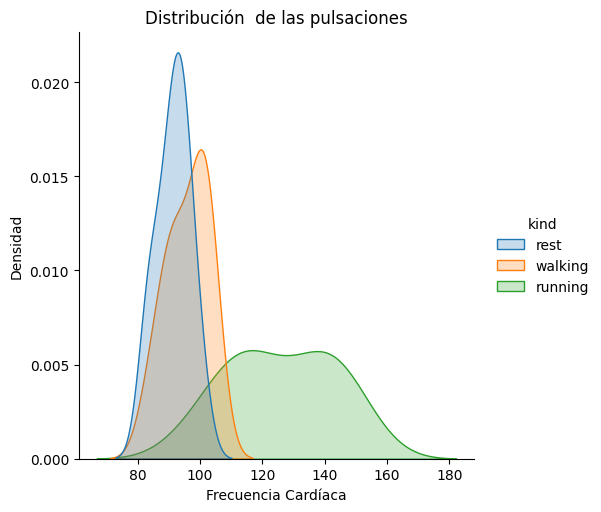

In [109]:
plt.figure()
# Figure -level
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

<Figure size 640x480 with 0 Axes>

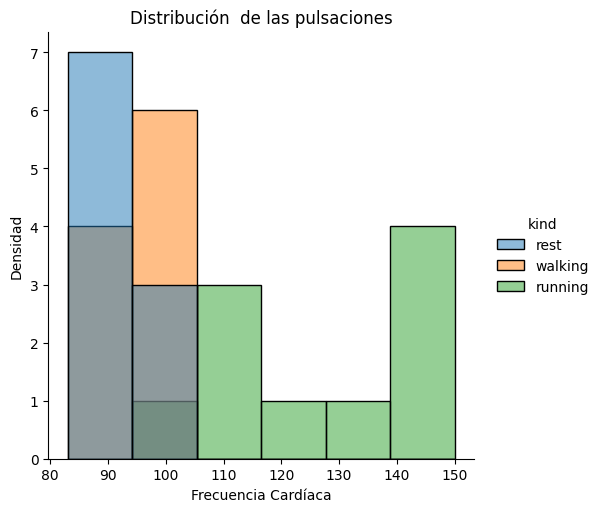

In [113]:
plt.figure()
# Figure -level
ax = sns.displot(data=df_30_min, x='pulse',kind='hist',  hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

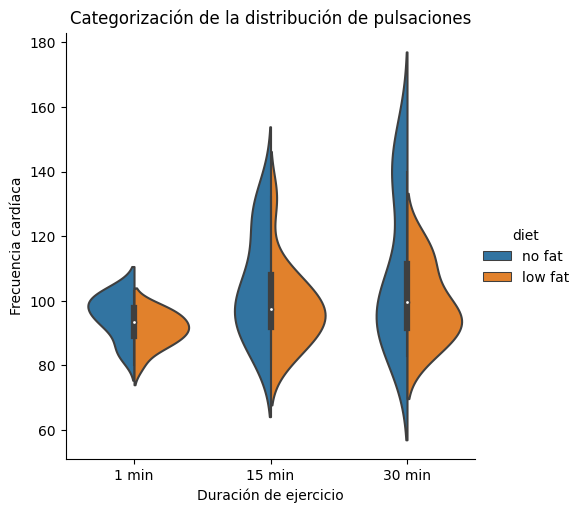

In [114]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')